In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Skyserver_SQL2_27_2018 6_51_39 PM.csv to Skyserver_SQL2_27_2018 6_51_39 PM.csv


In [4]:
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [7]:
df1 = df[['u', 'g', 'r', 'i', 'z', 'redshift', 'class']]
df1.head(10)

,u,g,r,i,z,redshift,class
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,STAR
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,STAR
2,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,GALAXY
3,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,STAR
4,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,STAR
5,19.43133,18.46779,18.16451,18.01475,18.04155,0.000315,STAR
6,19.38322,17.88995,17.10537,16.66393,16.36955,0.100242,GALAXY
7,18.97993,17.84496,17.38022,17.20673,17.07071,0.000315,STAR
8,17.90616,16.97172,16.67541,16.53776,16.47596,0.000089,STAR
9,18.67249,17.71375,17.49362,17.28284,17.22644,0.040508,GALAXY


In [8]:
print(f"Columns with missing values: \n{df.isna().any()}")

Columns with missing values: 
objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool


In [9]:
df2 = df.drop(['class'], axis=1)
df2

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229


<Axes: >

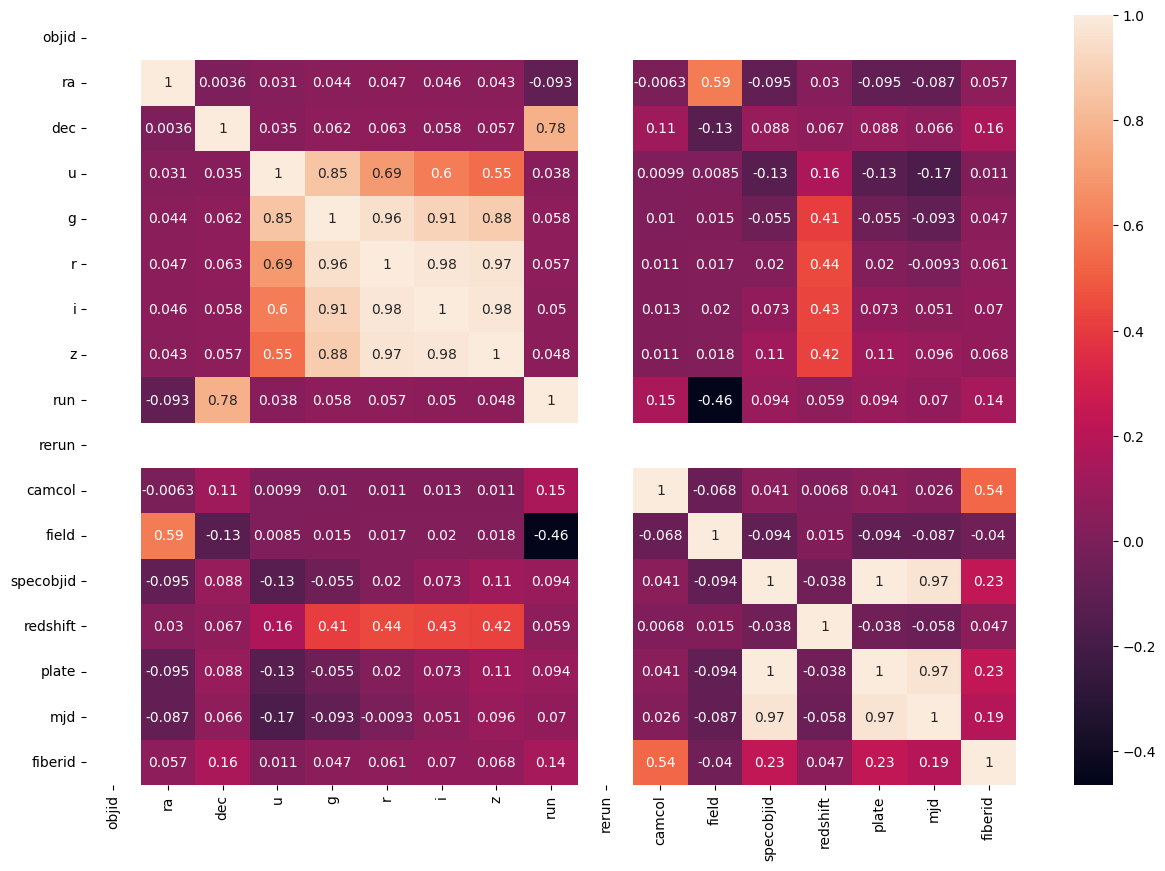

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True)

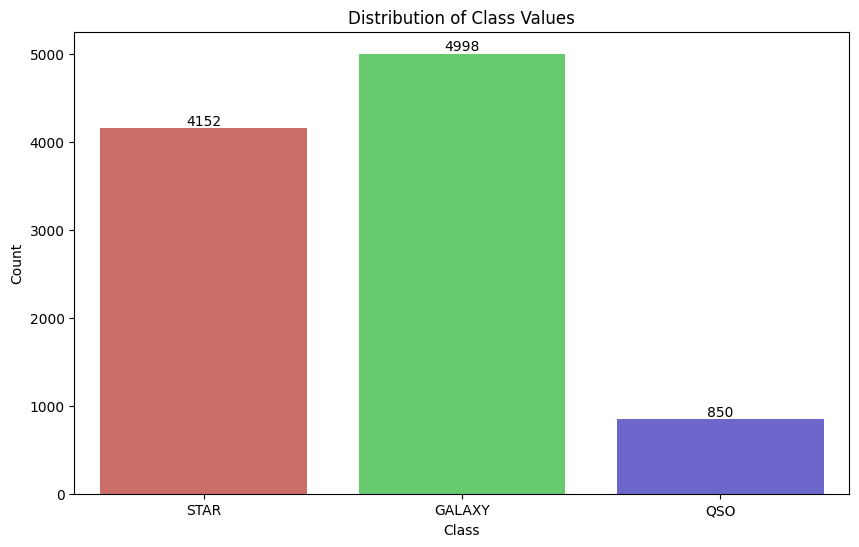

In [11]:
class_column = df['class']
unique_classes = class_column.unique()
class_counts = {}
for c in unique_classes:
  class_counts[c] = len(class_column[class_column == c])
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_classes, y=list(class_counts.values()), palette='hls')
for i, count in enumerate(class_counts.values()):
  plt.text(i, count, count, ha='center', va='bottom')
plt.title('Distribution of Class Values')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

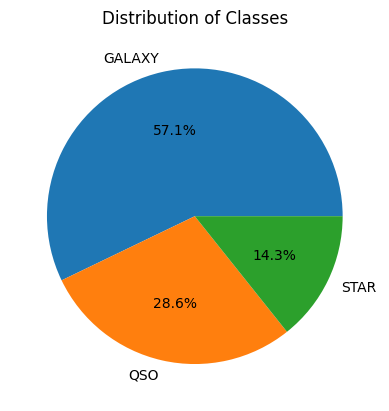

In [12]:
labels = ['GALAXY', 'QSO', 'STAR']
sizes = [100, 50, 25]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

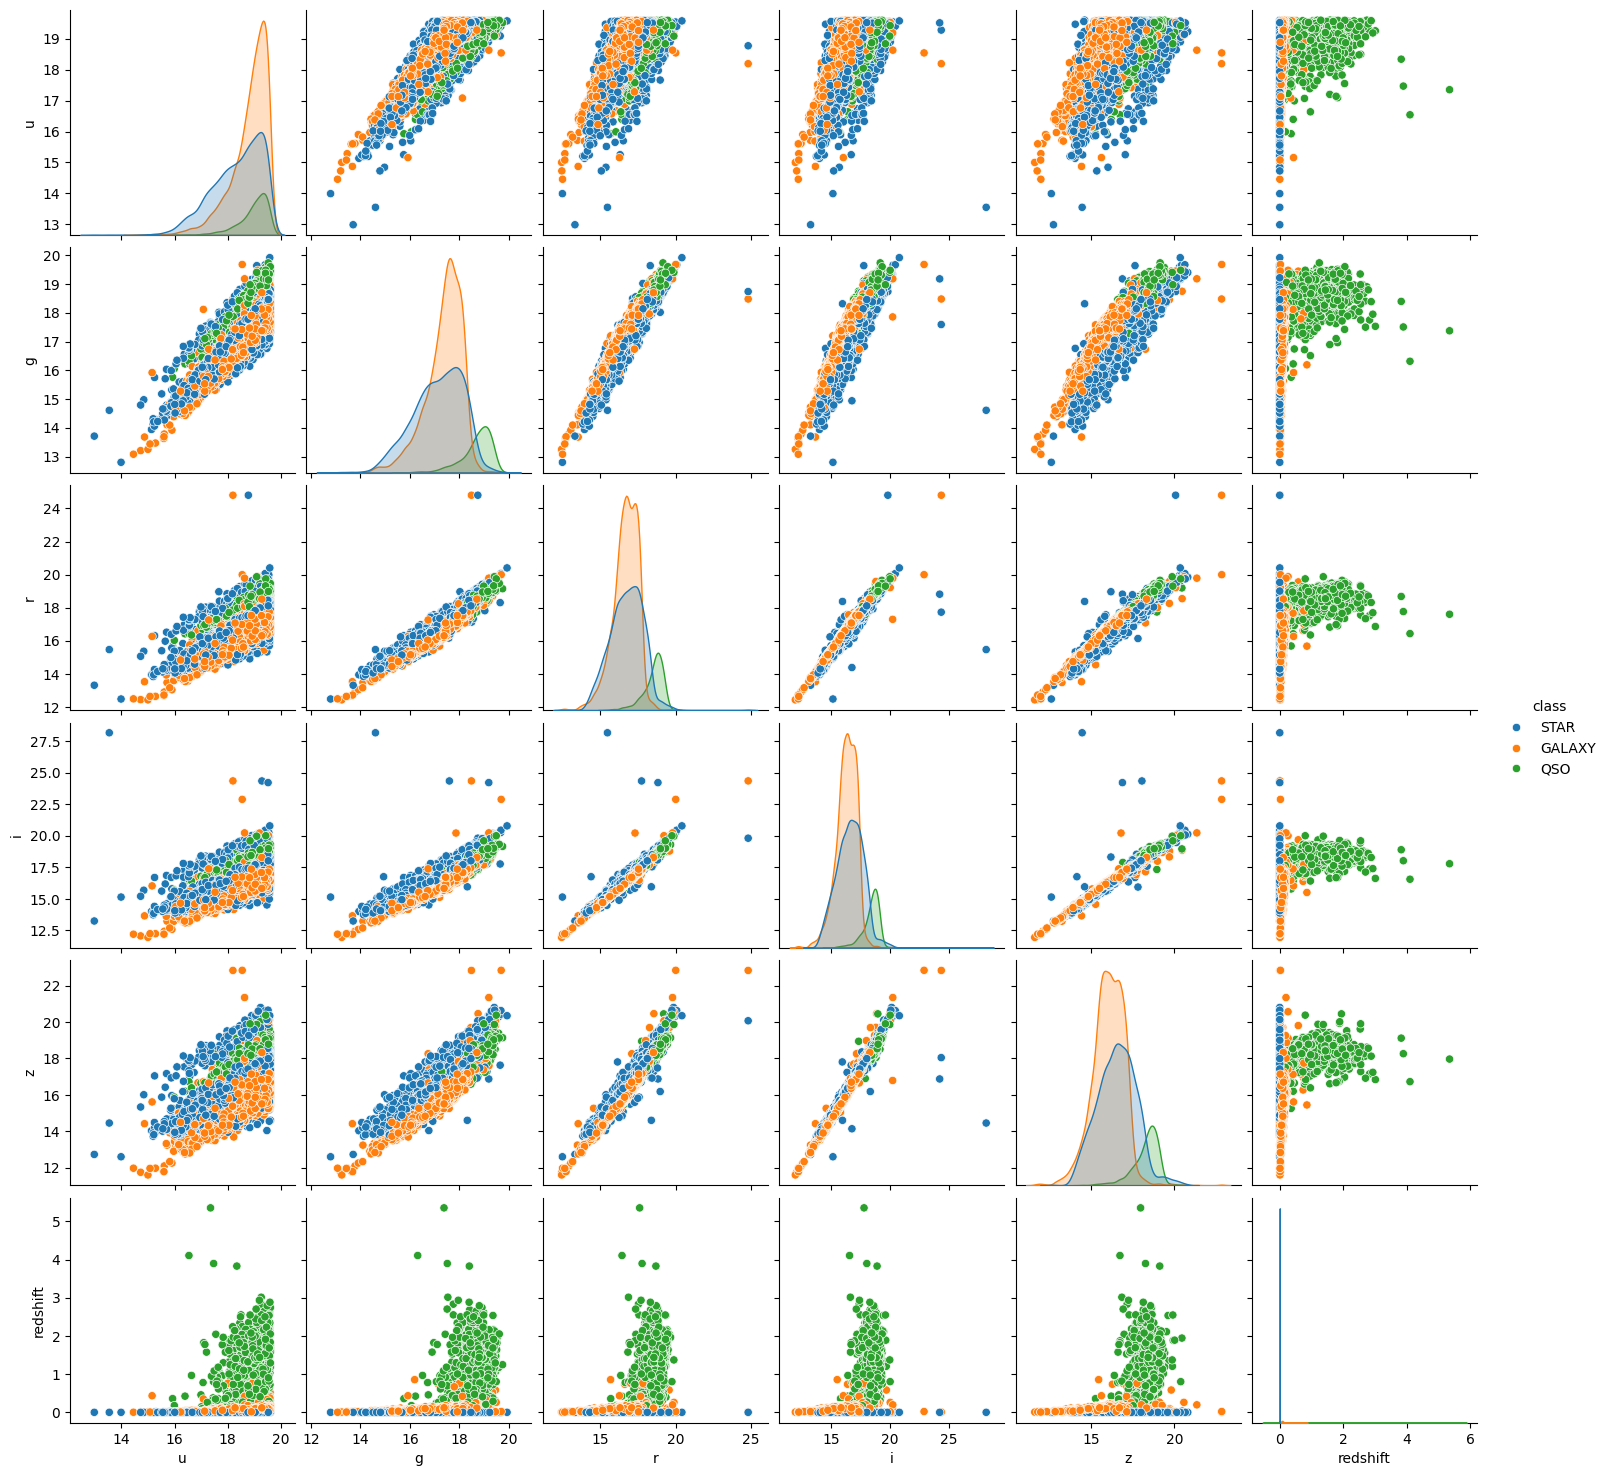

In [13]:
sns.pairplot(df1, hue='class')
plt.show()

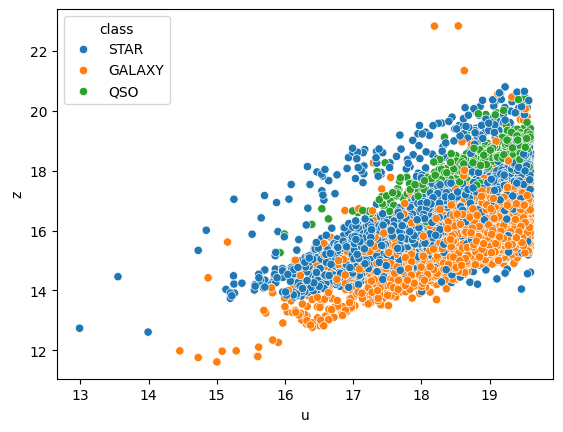

In [14]:
sns.scatterplot(x='u', y='z', hue='class', data=df1)
plt.show()

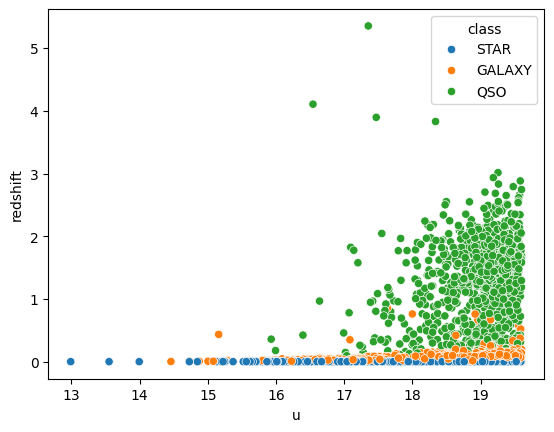

In [15]:
sns.scatterplot(x='u', y='redshift', hue='class', data=df1)
plt.show()

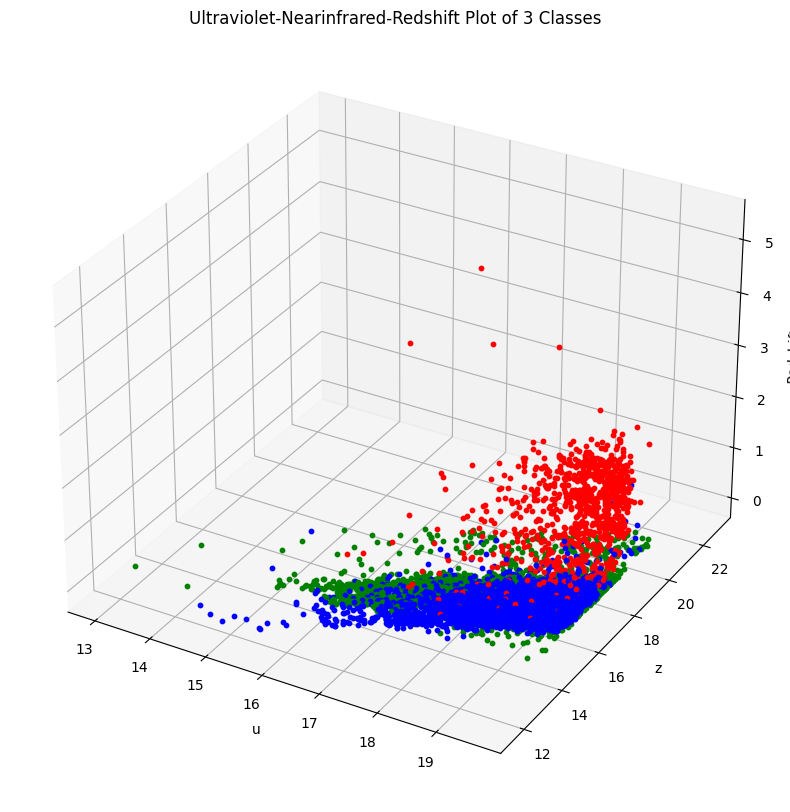

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {
    'GALAXY': 'blue',
    'QSO': 'red',
    'STAR': 'green'
}
for i, row in df1.iterrows():
    ax.scatter(row['u'], row['z'], row['redshift'], c=colors[row['class']], s=10)
ax.set_xlabel('u')
ax.set_ylabel('z')
ax.set_zlabel('Redshift')
ax.set_title('Ultraviolet-Nearinfrared-Redshift Plot of 3 Classes')
plt.show()

In [17]:
X = df.drop(['class'],axis='columns')
y = df['class']

In [18]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_scaled = standard_scaler.fit_transform(X)
X_new = minmax_scaler.fit_transform(X_scaled)

In [19]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_mapping = {class_label: encoded_value for class_label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
class_prints = []
for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")
    class_prints.append(class_label)
class_prints

GALAXY: 0
QSO: 1
STAR: 2


['GALAXY', 'QSO', 'STAR']

In [20]:
num_feats = 7
anova_selector = SelectKBest(score_func=f_classif, k=num_feats)
X_anova_selected = anova_selector.fit_transform(X_new, y_encoded)
chi2_selector = SelectKBest(score_func=chi2, k=num_feats)
X_chi2_selected = chi2_selector.fit_transform(X_new, y_encoded)
selected_features_anova_indices = anova_selector.get_support(indices=True)
print("Selected features using ANOVA:", selected_features_anova_indices)
selected_features_chi2_indices = chi2_selector.get_support(indices=True)
print("Selected features using chi-squared:", selected_features_chi2_indices)
if not np.array_equal(selected_features_anova_indices, selected_features_chi2_indices):
    common_feats = np.intersect1d(selected_features_anova_indices, selected_features_chi2_indices)
    print("Common features from the two selectors:", common_feats)
    print("Final number of features =", len(common_feats))
else:
    common_feats = selected_features_anova_indices
    print("Both selectors gave same results")

Selected features using ANOVA: [ 5  6  7 12 13 14 15]
Selected features using chi-squared: [ 4  5  7 12 13 14 15]
Common features from the two selectors: [ 5  7 12 13 14 15]
Final number of features = 6


In [21]:
final_X = pd.DataFrame(X_new).iloc[:, common_feats]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y_encoded, test_size=0.2, shuffle=True, random_state=42)

In [23]:
def conf_mat_plotter(conf_mat):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_prints, yticklabels=class_prints)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.9895


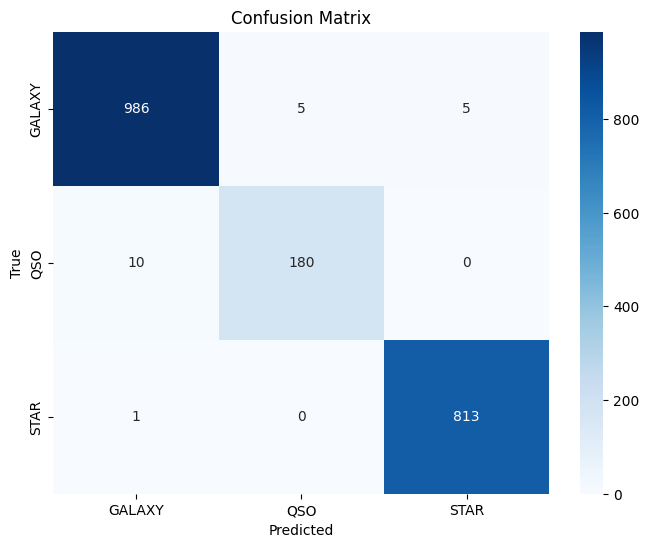

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
rf_conf_matrix = confusion_matrix(y_test, y_pred)
conf_mat_plotter(rf_conf_matrix)

Decision Tree Accuracy: 0.9845


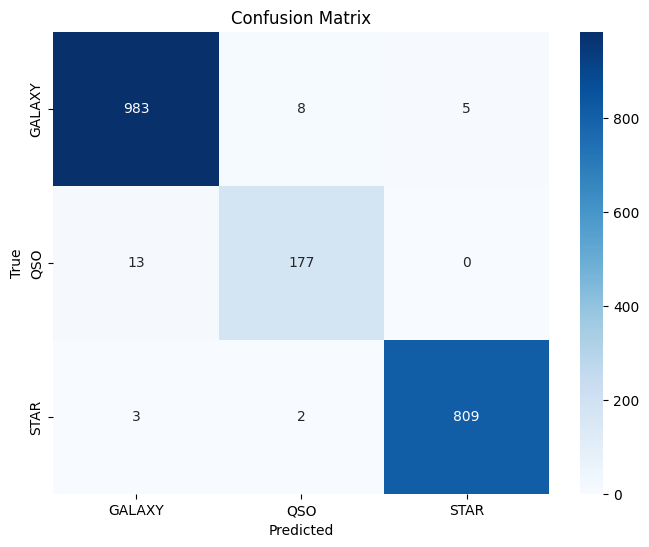

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_mat_plotter(dt_conf_matrix)

Support Vector Machine Accuracy: 0.94


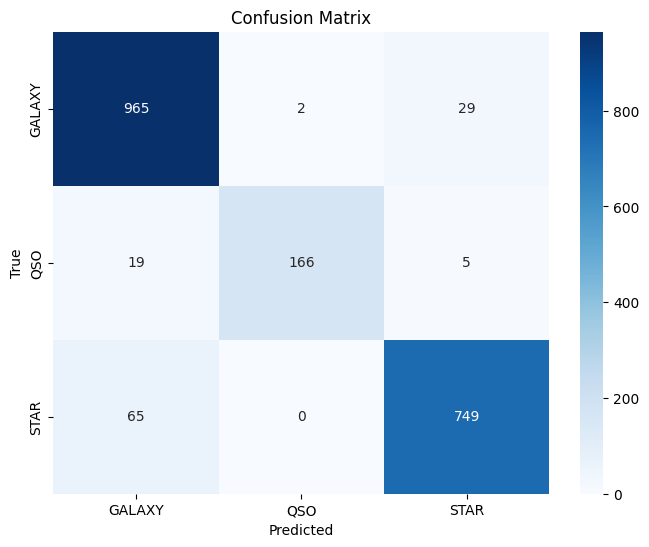

In [26]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", svm_accuracy)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
conf_mat_plotter(svm_conf_matrix)

Gaussian Naive Bayes Accuracy: 0.96


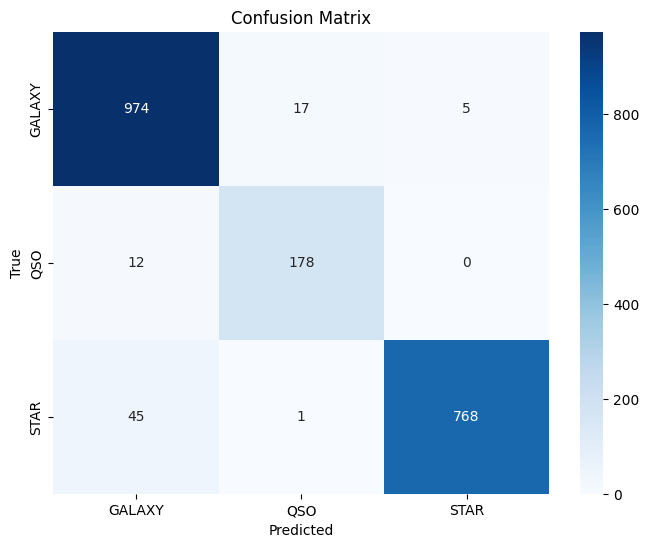

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_gnb = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
gnb_conf_matrix = confusion_matrix(y_test, y_pred_gnb)
conf_mat_plotter(gnb_conf_matrix)

KNN Accuracy: 0.96


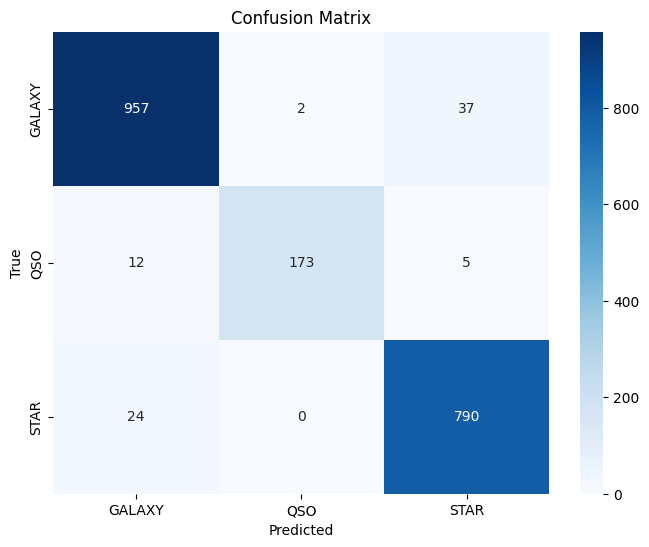

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
conf_mat_plotter(knn_conf_matrix)

XGBClassifier Accuracy: 0.9885


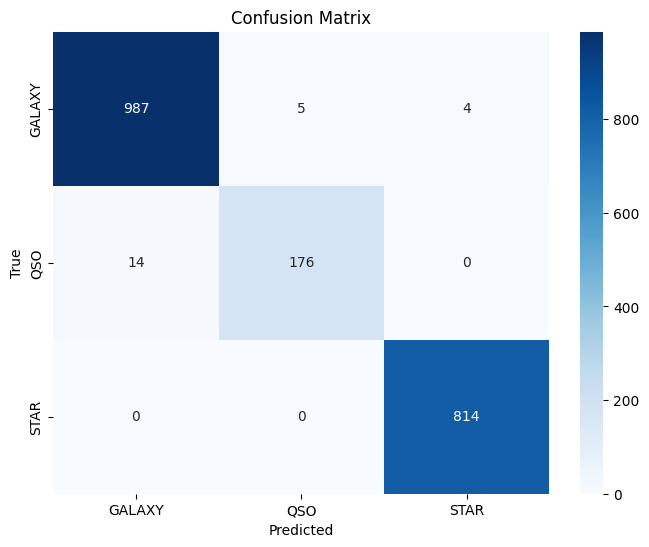

In [29]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBClassifier Accuracy:", xgb_accuracy)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
conf_mat_plotter(xgb_conf_matrix)

In [35]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_prints))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=class_prints))

print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_prints))

Random Forest Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       996
         QSO       0.97      0.95      0.96       190
        STAR       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

Decision Tree Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99       996
         QSO       0.95      0.93      0.94       190
        STAR       0.99      0.99      0.99       814

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.92      0.97      0.94       996
         

In [36]:
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb, target_names=class_prints))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=class_prints))

print("XGBClassifier Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=class_prints))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.94      0.98      0.96       996
         QSO       0.91      0.94      0.92       190
        STAR       0.99      0.94      0.97       814

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000

KNN Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96       996
         QSO       0.99      0.91      0.95       190
        STAR       0.95      0.97      0.96       814

    accuracy                           0.96      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000

XGBClassifier Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       996
         QSO       0.

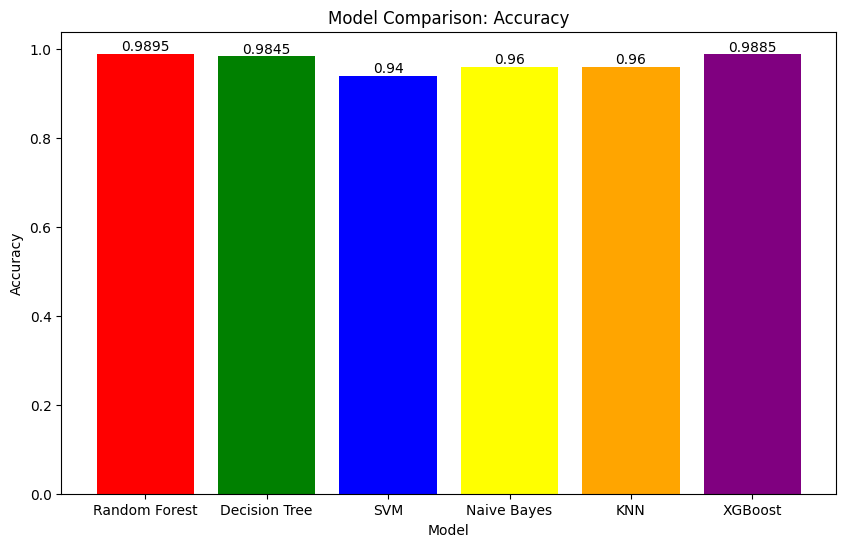

In [31]:
model_names = ['Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'KNN', 'XGBoost']
accuracy_scores = [rf_accuracy, dt_accuracy, svm_accuracy, gnb_accuracy, knn_accuracy, xgb_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['red', 'green', 'blue', 'yellow', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
for i, value in enumerate(accuracy_scores):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

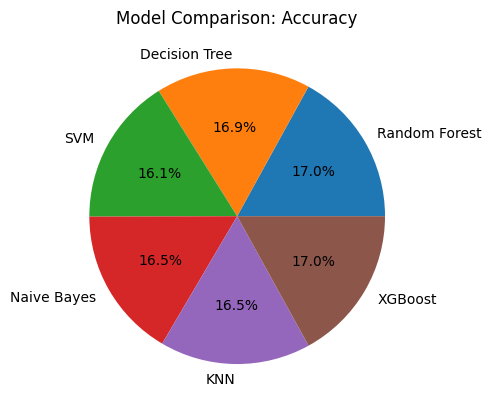

In [32]:
model_names = ['Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'KNN', 'XGBoost']
accuracy_scores = [rf_accuracy, dt_accuracy, svm_accuracy, gnb_accuracy, knn_accuracy, xgb_accuracy]
plt.pie(accuracy_scores, labels=model_names, autopct='%1.1f%%')
plt.title('Model Comparison: Accuracy')
plt.show()

In [33]:
model_names = ['Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'KNN', 'XGBoost']
accuracy_scores = [rf_accuracy, dt_accuracy, svm_accuracy, gnb_accuracy, knn_accuracy, xgb_accuracy]
highest_accuracy = max(accuracy_scores)
highest_accuracy_model_index = accuracy_scores.index(highest_accuracy)
highest_accuracy_model = model_names[highest_accuracy_model_index]
print(f"Highest accuracy model: {highest_accuracy_model} with accuracy of {highest_accuracy}")

Highest accuracy model: Random Forest with accuracy of 0.9895


In [ ]:
u = float(input("Enter the value of u: "))
g = float(input("Enter the value of g: "))
r = float(input("Enter the value of r: "))
i = float(input("Enter the value of i: "))
z = float(input("Enter the value of z: "))
redshift = float(input("Enter the value of redshift: "))
new_data_point = [u, g, r, i, z, redshift]
prediction = rf_classifier.predict([new_data_point])
if prediction[0] == 0:
    print("It will be a Galaxy")
elif prediction[0] == 1:
    print("It will be a QSO")
else:
    print("It will be a Star")

Enter the value of u: 19.47406
Enter the value of g: 17.0424
Enter the value of r: 15.94699
Enter the value of i: 15.94699
Enter the value of z: 15.22531
Enter the value of redshift: -8.96E-06
QSO
